## Getting Started
---

This presentation is no help if you can't get the python packages it uses! There are a few options here. If you're not already set up, probably the easiest way to install python packages is [pip](https://pip.pypa.io/en/stable/). If you don't already have it, here are [installation instructions](https://packaging.python.org/installing/#install-pip-setuptools-and-wheel). I'm a big fan of the [anaconda](https://www.continuum.io/) python distrubution, which comes pre-loaded with basically everything I'm using today. Just use whatever works for you. 

For example, installing numpy is easy, in a command line:

pip install numpy

If you're using anaconda, you can also use their package manager:

conda install numpy

Pip is probably the preferred method, even when you're using anaconda. The packages I'm discussing today are [numpy](http://www.numpy.org/), [scipy](https://www.scipy.org/), [pandas](http://pandas.pydata.org/), [matplotlib](http://matplotlib.org/), [seaborn](https://stanford.edu/~mwaskom/software/seaborn/) (access forbidden? never seen that before), [Numba](http://numba.pydata.org/) and [Cython](http://cython.org/). As far as I know, all of these are in both package managers. 

This talk was made using a [jupyter](http://jupyter.org/) notebook. 

## Python is slow! Why bother?
---

This is a common reason people want to avoid python, and it's half true. See for example this function that performs a matrix multiplication:

In [1]:
import time
import math
N = 300

mat1 = [[1.5*i + j for i in range(N)] for j in range(N)]
mat2 = [[2.5*i + j for i in range(N)] for j in range(N)]

def mmult(mat1, mat2):
    mat3 = [[0.0 for i in range(N)] for j in range(N)]
    
    for i in range(N):     
        for k in range(N):  
            for j in range(N):  
                mat3[i][k] += mat1[i][j] * mat2[j][k]
    return mat3

%time m3 = mmult(mat1, mat2)

CPU times: user 6.28 s, sys: 20 ms, total: 6.3 s
Wall time: 6.28 s


Well that doesn't seem so bad! This would take longer to do by hand! It actually is pretty slow.  [Here's](https://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/)
a look at some of the reasons why. It has to do with the fact that python is dynamically typed and interpreted, rather than compiled. Additionally, the arrays in native python aren't laid out in one chunk of memory.


## It doesn't have to be this way! (Numpy section)
---

If you're going to be doing serious numerical work in python, numpy is essential. If you're doing a lot of work with arrays, the performance difference between raw python and C/C++/Fortran can easily be several orders of magnitude. Numpy is focused on fast, efficient manipulation of arrays. They can be any size, any dimension as long as your computer can store it. Numpy methods are compiled and very efficient (comparable to compiled code). Let's take a look at our matrix multiply again:

In [2]:
import numpy as np # convention

npmat1 = np.asarray(mat1) # use numpy arrays, they are contiguous
npmat2 = np.asarray(mat2)

%time npmat3 = np.dot(npmat1, npmat2) # dot is used for dot product 
                                      # or matrix multiply

CPU times: user 16 ms, sys: 16 ms, total: 32 ms
Wall time: 367 ms


WHOA! Blazing fast! Morale of the story: if there is a numpy function to do it, use it! And there  is a numpy function for a lot of stuff, here's a few useful ones:

[np.linalg.eig](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.eig.html) - eigenvectors/values 

[np.zeros](http://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) - create an array of zeros

[np.linspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) - create an array of values spaced linearly between 2 endpoints

[np.sort](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.sort.html) - Sort an array

[np.amax](http://docs.scipy.org/doc/numpy/reference/generated/numpy.amax.html) - Return maximum value of array

[np.random.rand](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html) - create array of random values in [0, 1)

There's about 3 trillion more ... 

## A few useful tips about numpy arrays:
---
### 1) Most 'normal' operations are element-wise:

In [3]:
A = np.array([[1, 2, 3]
             ,[4, 5, 6]
             ,[7, 8, 9]])

B = np.array([[9, 8, 7]
             ,[6, 5, 4]
             ,[3, 2, 1]])

print "     10 + A =   \n", 10 + A
print "\n    2 * A =   \n", 2 * A
print "\n       A == 5 \n", A == 5
print "\n    A + B =   \n", A + B

     10 + A =   
[[11 12 13]
 [14 15 16]
 [17 18 19]]

    2 * A =   
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]

       A == 5 
[[False False False]
 [False  True False]
 [False False False]]

    A + B =   
[[10 10 10]
 [10 10 10]
 [10 10 10]]


### 2) You can 'slice' numpy arrays

In [26]:
print "3rd col = ", A[:, 2], '\n'  # 3rd column (starts at 0)

print "1st row = ", A[0, :], '\n'

print "top left 2x2 = \n", A[:2, :2]

3rd col =  [3 6 9] 

1st row =  [1 2 3] 

top left 2x2 = 
[[1 2]
 [4 5]]


### 3) You can index a numpy array... with a numpy array

In [8]:
indices = np.array([0, 2])
print "1st and 3rd row of A = \n", A[indices], '\n'

print "1st and 3rd column of A = \n", A[:,indices], '\n'

indices2 = np.asarray([[True, True, False]
                     ,[False, True, True]
                     ,[False, False, False]])

print "array mask of A = \n", A[indices2]

1st and 3rd row of A = 
[[1 2 3]
 [7 8 9]] 

1st and 3rd column of A = 
[[1 3]
 [4 6]
 [7 9]] 

array mask of A = 
[1 2 5 6]


### 4) And you can combine operations

In [6]:
symmetric = np.array([[1, 4, 4]
                     ,[4, 1, 4]
                     ,[4, 4, 1]])

asymmetric = np.array([[1, 4, 4]
                      ,[7, 1, 4]
                      ,[42, 5, 1]])

print "Symmetric is symmetric? \n", np.all(symmetric.T == symmetric)

print "Asymmetric is symmetric? \n", np.all(asymmetric.T == symmetric)

print "All elements of asymmetric above 4.5:"

indices = np.where(asymmetric > 4.5)

print asymmetric[indices]

Symmetric is symmetric? 
True
Asymmetric is symmetric? 
False
All elements of asymmetric above 4.5:
[ 7 42  5]


## Scipy
---

We're all scientists here, so It would be silly to avoid scipy. It's a library of scientifically relevant tools. Here's a list of some of the submodules:

Special functions (scipy.special)

Integration (scipy.integrate)

Optimization (scipy.optimize)

Interpolation (scipy.interpolate)

Fourier Transforms (scipy.fftpack)

Signal Processing (scipy.signal)

Linear Algebra (scipy.linalg)

Sparse Eigenvalue Problems with ARPACK

Compressed Sparse Graph Routines (scipy.sparse.csgraph)

Spatial data structures and algorithms (scipy.spatial)

Statistics (scipy.stats)

Multidimensional image processing (scipy.ndimage)

File IO (scipy.io)

Weave (scipy.weave)

In [16]:
from math import factorial, pi
from scipy.special import hermite as h
import matplotlib.pyplot as plt
# Jupyter  "Magic" 
%matplotlib inline 

def psi(x, n):
    N = 1.0 / np.sqrt(2**n * factorial(n)) * (1.0 / pi)
    return N * np.exp(-x*x / 2.0) * h(n)(x)

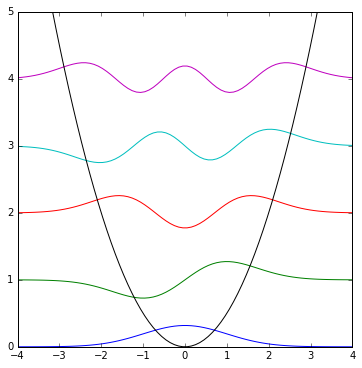

In [25]:
fig = plt.figure(figsize=(6,6))
x = np.linspace(-5, 5, 100)
for n in range(5):
    plt.plot(x, psi(x, n) + (n + 1/2))
plt.plot(x, 0.5 * x*x, 'k')
plt.xlim(-4,4)
plt.ylim(0,5)
plt.show()